# Solving Linear elliptic equation with 2nd order finite difference approximation

u''(x) = f(x) , x ∈ [0, 1] , u'(0) = 0 = u(1) ,

f(x) = −(1 + x)(x^2 + 4x − 2)e^x

16
32
48
64
80
96
112
128


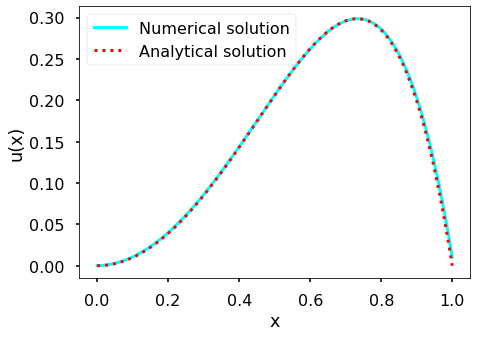

In [26]:
import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

e = []

for o in range(1,9):
    n = 16*o
    h = 1/n

    # Get A
    A = np.zeros((n, n))
    A[0, 0] = -1
    A[0, 1] = 1
    A[n-1, n-1] = -3
    A[n-1, n-2] = 1
    for i in range(1, n-1):
        A[i, i-1] = 1
        A[i, i] = -2
        A[i, i+1] = 1

    #print(A)

    # Get b
    f = np.zeros(n)
    x = np.zeros(n)
    for j in range(0, n):
        x[j] = (j + 1/2)*h
        f[j] = -(1+x[j])*(x[j]**2 + 4*x[j] -2)*math.exp(x[j])*h**2

    #tridiagonal solver
    cp = np.zeros(n)
    fp = np.zeros(n)
    cp[0] = A[0,1]/A[0,0]
    fp[0] = f[0]/A[0,0]
    for k in range(1, n-1):
        cp[k] = A[k,k+1]/(A[k,k] - A[k,k-1]*cp[k-1])
        fp[k] = (f[k]-A[k,k-1]*fp[k-1])/(A[k,k]-A[k,k-1]*cp[k-1])
    fp[n-1] = (f[n-1] - A[n-1,n-2]*fp[n-2])/(A[n-1,n-1]-A[n-1,n-2]*cp[n-2])


    u = np.zeros(n)   
    u[n-1] = fp[n-1]
    for l in range(2, n+1):
        u[n-l] = fp[n-l] - cp[n-l]* u[n-l+1]


    #optional: to compare the result of tridiagonal solver with inbuild solver
    #u1 = np.linalg.solve(A, f)

    #analytical solution
    y = np.linspace(0, 1, n)
    sol = (1-y)*y**2*np.exp(y)

    #calculate error
    e.append(np.linalg.norm(sol - u)*1/n)
    print(n)

#plot numerical result u and analytical solution sol
plt.figure(figsize=(7,5))
plt.plot(y, u, label = "Numerical solution", color = "cyan", linewidth = "3")
#plt.plot(1, 10, 'ro')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.plot(y,sol, linestyle = "dotted", color ="red",label = "Analytical solution", linewidth = "3")
plt.legend()
plt.show()

Convergence order =1.6036431705791485


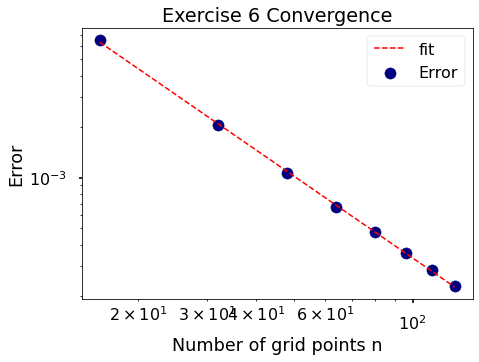

In [27]:
from scipy.optimize import curve_fit

#linear fit to find convergence order
#y1 = np.array([16, 24, 32, 40, 48, 56, 64, 72])
y1 = np.array([16, 32, 48, 64, 80, 96, 112, 128])
#y1 = np.array([32, 64, 96, 128, 160, 192, 224, 256])


def fit_func(x1, a, b):
    return a*x1 + b

params = curve_fit(fit_func,np.log(y1), np.log(e))

[a,b] = params[0]
print('Convergence order =' + str(-a))

#plot error vs gridpoints and fit
plt.figure(figsize=(7,5))
plt.scatter(y1, e, color = "navy", label = "Error", marker = 'o')
plt.plot(y1, np.exp(a*(np.log(y1)) +b), linestyle = "dashed", linewidth = "1.5", color = "red", label = "fit")
plt.yscale('log')
plt.ylabel('Error')
plt.xscale('log')
plt.xlabel('Number of grid points n')
plt.title('Exercise 6 Convergence')
plt.legend()
plt.show()